In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## Scale images

In [18]:
X_train = X_train / 255
X_test = X_test / 255

## Use CNN

In [19]:
X_test.shape[1:]

(28, 28, 1)

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Softmax as multiple class classification
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1416 - accuracy: 0.9578
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0183 - accuracy: 0.9944


In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9898


[0.030322659760713577, 0.989799976348877]

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'Truth')

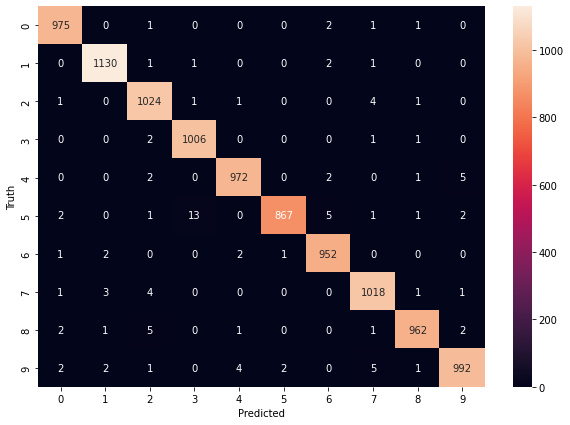

In [25]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')